In [145]:
# Importing the dependencies
import numpy as np
import pandas as pd
from xgboost import plot_importance, plot_tree
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [146]:
# Read in data as pandas dataframe and display first 5 rows
df = pd.read_csv('project_c_原本.csv')

# Feature Extraction
df["date"] = pd.to_datetime(df["date"])
df["hour"] = df["date"].dt.hour
df["dayofweek"] = df["date"].dt.dayofweek
df["quarter"] = df["date"].dt.quarter
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["dayofyear"] = df["date"].dt.dayofyear
df["sin_day"] = np.sin(df["dayofyear"])
df["cos_day"] = np.cos(df["dayofyear"])
df["dayofmonth"] = df["date"].dt.day
df["weekofyear"] = df["date"].dt.weekofyear

df = df.drop(["date", "year", "hour"], axis = 1)
print(df)

           cost  dayofweek  quarter  month  dayofyear   sin_day   cos_day  \
0    102.846259          5        1      1          1  0.841471  0.540302   
1    104.156002          6        1      1          2  0.909297 -0.416147   
2    104.207416          0        1      1          3  0.141120 -0.989992   
3    104.318806          1        1      1          4 -0.756802 -0.653644   
4    104.389564          2        1      1          5 -0.958924  0.283662   
..          ...        ...      ...    ...        ...       ...       ...   
329   89.183575          5        4     11        330 -0.132382 -0.991199   
330   91.453141          6        4     11        331 -0.905591 -0.424152   
331   92.052679          0        4     11        332 -0.846204  0.532859   
332   91.952614          1        4     11        333 -0.008821  0.999961   
333   92.300659          2        4     11        334  0.836672  0.547704   

     dayofmonth  weekofyear  
0             1          52  
1             2

C:\Users\魏詩庭\AppData\Local\Temp\ipykernel_22504\4272994313.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["weekofyear"] = df["date"].dt.weekofyear


In [147]:
# Train and test data
train = df[:288]
test = df[288:]
# Train test split
X_train = train.drop(["cost"], axis = 1)
y_train = train["cost"]
X_test = test.drop(["cost"], axis = 1)
y_test = test["cost"]

In [148]:
# Model Training
reg = xgb.XGBRegressor(objective = "reg:squarederror", n_estimators = 1000)
reg.fit(X_train, y_train, verbose = True)

# Prediction
yhat = reg.predict(X_test)
print(type(yhat))

# Model Evaluation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE: %f" %(rmse))

<class 'numpy.ndarray'>
RMSE: 2.457146


Text(0, 0.5, 'Cost')

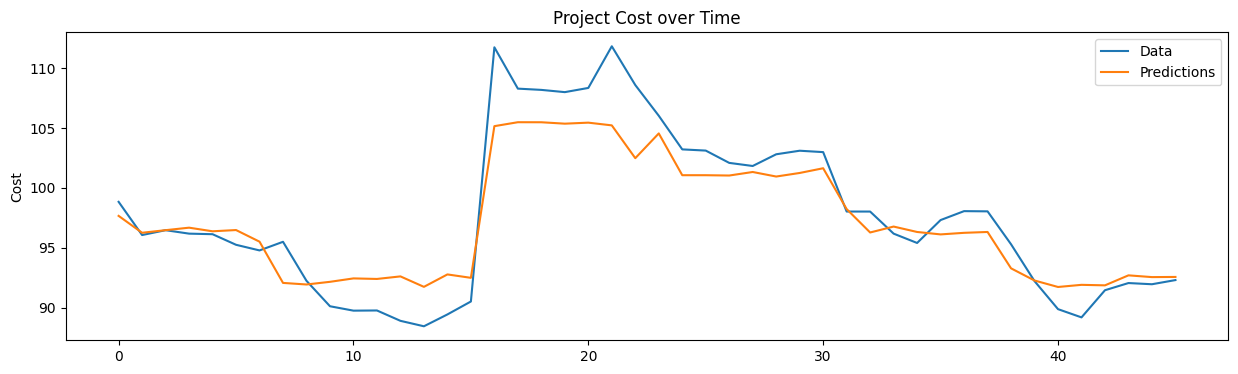

In [149]:

# ground truth vs. prediction
plt.figure(figsize=(15,4))
plt.plot(y_test.values)
plt.plot(yhat)

plt.legend(('Data', 'Predictions'))

plt.title('Project Cost over Time')
plt.ylabel('Cost')


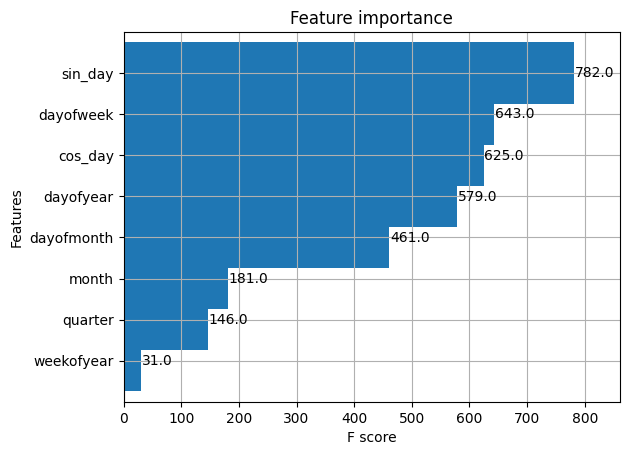

In [150]:
# Feature importance

test = plot_importance(reg, height=1.5)

In [151]:
#Validation
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Train and test data
train = df[:258]
test = df[258:289]
# Train test split
X_train = train.drop(["cost"], axis = 1)
y_train = train["cost"]
X_test = test.drop(["cost"], axis = 1)
y_test = test["cost"]

window = [25, 30, 35, 40, 45, 50]

for each in window:
    prediction = []
    for i in range(31):
        rolling_train = train[-each:]
        X_train = rolling_train.drop(["cost"], axis = 1)
        y_train = rolling_train["cost"]
        rolling_test = test[i:i+1]
        X_test = rolling_test.drop(["cost"], axis = 1)
        # Model Training
        reg = xgb.XGBRegressor(objective = "reg:squarederror", n_estimators = 1000)
        reg.fit(X_train, y_train, verbose = True)

        # Prediction
        yhat = reg.predict(X_test)
        train = df[:258+i]
        prediction.append(yhat)
    
    # Model Evaluation
    from sklearn.metrics import mean_squared_error as MSE
    rmse = np.sqrt(MSE(y_test, prediction))
    print(each, "RMSE: %f" %(rmse))


25 RMSE: 4.987702
30 RMSE: 4.193965
35 RMSE: 2.189611
40 RMSE: 2.434517
45 RMSE: 2.236994
50 RMSE: 2.252685


[array([0.00124967, 0.        , 0.02081057, 0.00384308, 0.00250785,
       0.01120012, 0.96038866, 0.        ], dtype=float32)]
RMSE: 2.287609


'\ntest = plot_importance(reg, height=1.5)\nprint(test)\n'

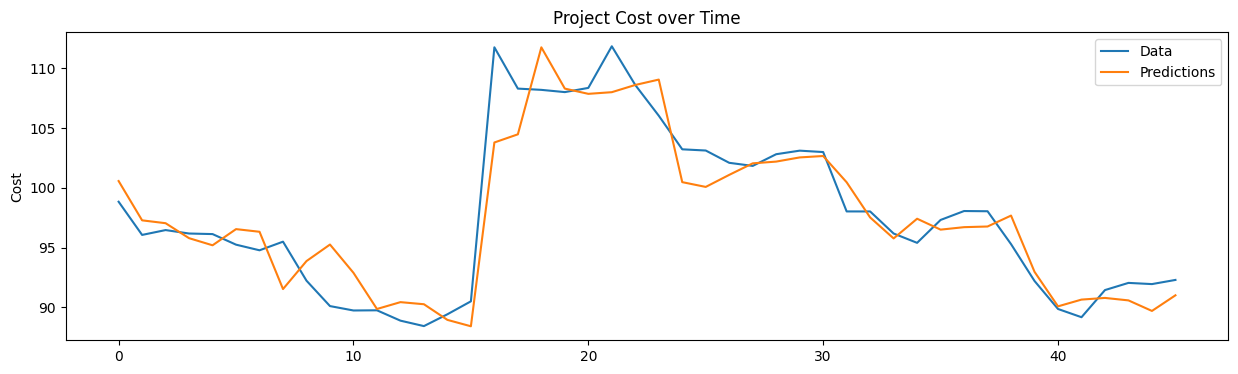

In [155]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot


# Train and test data
train = df[:288]
test = df[288:]
# Train test split
X_train = train.drop(["cost"], axis = 1)
y_train = train["cost"]
X_test = test.drop(["cost"], axis = 1)
y_test = test["cost"]

window_size = 35 # change by the result above
prediction = []
for i in range(46):
    rolling_train = train[-window_size:]
    X_train = rolling_train.drop(["cost"], axis = 1)
    y_train = rolling_train["cost"]
    rolling_test = test[i:i+1]
    X_test = rolling_test.drop(["cost"], axis = 1)
    # Model Training
    reg = xgb.XGBRegressor(objective = "reg:squarederror", n_estimators = 1000)
    reg.fit(X_train, y_train, verbose = True)

    # Prediction
    yhat = reg.predict(X_test)
    train = df[:288+i]
    prediction.append(yhat)
    #print(yhat)

    #Features
    lst_f = []
    element = reg.feature_importances_
    lst_f.append(element)

# ground truth vs. prediction
plt.figure(figsize=(15,4))
plt.plot(y_test.values)
plt.plot(prediction)

plt.legend(('Data', 'Predictions'))

plt.title('Project Cost over Time')
plt.ylabel('Cost')

# Model Evaluation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, prediction))
print("RMSE: %f" %(rmse))


<class 'numpy.ndarray'>


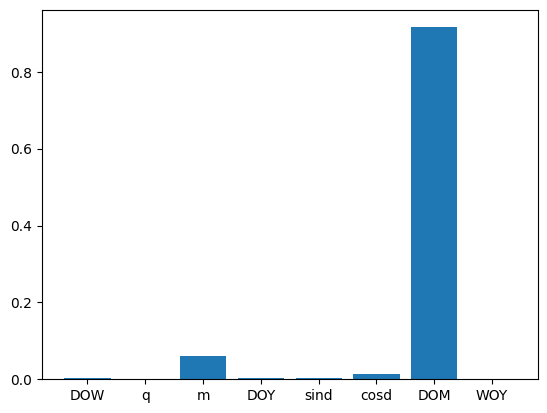

In [153]:
def original_features_plot():

    lst_f = np.array(lst_f)
    plot = np.mean(lst_f, axis=0)
    print(type(plot))
    pyplot.bar(["DOW", "q", "m", "DOY", "sind", "cosd", "DOM", "WOY"]
    , plot)
    pyplot.show()

<class 'numpy.ndarray'>


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (13,) and arg 1 with shape (8,).

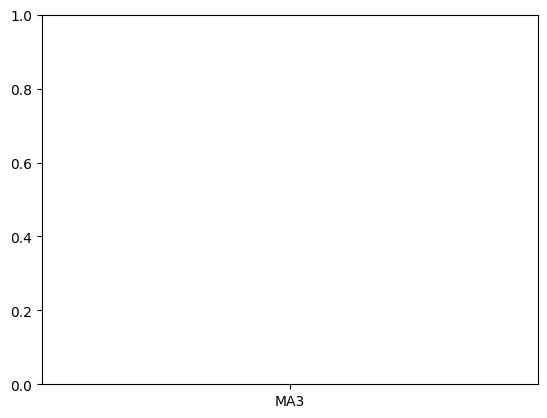

In [154]:
def new_features_plot():

    lst_f = np.array(lst_f)
    plot = np.mean(lst_f, axis=0)
    print(type(plot))
    pyplot.bar(["MA3", "MA4", "MA5", "MA6", "MA7", "DOW", "q", "m", "DOY", "sind", "cosd", "DOM", "WOY"], plot)
    pyplot.show()